# Directional Forecasting of the NASDAQ Index with Machine Learning
By Nolan Moss

7/8/2025
Northwest Missouri State University, Maryville MO 64468, USA

email: s573653@nwmissouri.edu, nolanmmoss@gmail.com

GitHub: https://github.com/Crusoe22/Moss_ML_Capstone

Overleaf Report: https://www.overleaf.com/read/jcwythzsmyxw#6fd6b9

### Data Extraction of Yahoo Finance

In [ ]:
# Import packages
import yfinance as yf
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

# Query Historical Prices
nasdaq = nasdaq.history(period="max")

# Save data to CSV file
nasdaq.copy().to_csv('nasdaq_yf_raw.csv')

In [3]:
# Display the data
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-03 00:00:00-04:00,20497.660156,20624.509766,20480.220703,20601.099609,6177910000,0.0,0.0
2025-07-07 00:00:00-04:00,20490.550781,20511.820312,20323.019531,20412.519531,8345710000,0.0,0.0
2025-07-08 00:00:00-04:00,20466.929688,20480.890625,20377.359375,20418.460938,8437480000,0.0,0.0


### Explore the Data

In [4]:
# Shape of Data (Rows, Columns)
nasdaq.shape

(13722, 7)

In [5]:
# Column names
nasdaq.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
# Check datatype of each column 
print("Column datatypes: ")
print(nasdaq.dtypes)

Column datatypes: 
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [7]:
# Check for Null values
nasdaq.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

**Reflection:** The absence of missing values is expected, as the data originates from Yahoo Finance, a widely trusted and highly regulated platform frequently used by financial analysts and developers. Yahoo ensures the integrity and completeness of its datasets, providing users with clean and reliable financial data.

In [8]:
# Show DateTime index
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-26 00:00:00-04:00', '2025-06-27 00:00:00-04:00',
               '2025-06-30 00:00:00-04:00', '2025-07-01 00:00:00-04:00',
               '2025-07-02 00:00:00-04:00', '2025-07-03 00:00:00-04:00',
               '2025-07-07 00:00:00-04:00', '2025-07-08 00:00:00-04:00',
               '2025-07-09 00:00:00-04:00', '2025-07-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13722, freq=None)

In [9]:
# Describe data
nasdaq.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,13722.000000,13722.000000,13722.000000,13722.000000,1.372200e+04,13722.0,13722.0
mean,2951.907511,2972.298842,2929.087029,2952.050277,1.344633e+09,0.0,0.0
std,4216.899440,4246.633388,4184.238229,4217.641409,1.853494e+09,0.0,0.0
min,54.869999,54.869999,54.869999,54.869999,0.000000e+00,0.0,0.0
25%,281.869987,282.422493,281.265007,281.814987,0.000000e+00,0.0,0.0
50%,1421.500000,1443.190002,1401.155029,1422.989990,7.342600e+08,0.0,0.0
75%,3099.352417,3117.030090,3078.437561,3102.132507,1.970020e+09,0.0,0.0
max,20636.500000,20653.855469,20498.728516,20645.277344,9.397454e+10,0.0,0.0


In [ ]:
# Drop the columns Dividends and Stock Splits
nasdaq_df = nasdaq.drop(columns=['Dividends', 'Stock Splits'])

**Reflection:** The columns Dividends and Stock Splits are not good indicators for a machine learning model because they occur infrequently and irregularly, providing sparse data that lacks consistent patterns. Additionally, these events are often driven by company-level strategic decisions rather than market trends, making them less predictive of short-term price movements or broader market behavior. Including them could introduce noise rather than signal, potentially reducing model performance. 

### Visualize the Data

<Axes: title={'center': 'NASDAQ Closing Price Over Time'}, xlabel='Date'>

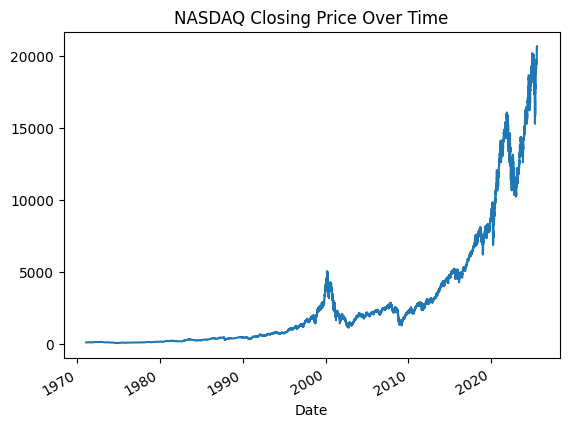

In [11]:
# Visulize the Close price data 
nasdaq_df['Close'].plot(title='NASDAQ Closing Price Over Time')

**Reflection:** We observe a sharp upward trend in the closing price, particularly between 1970 and 1999. This period behaves very differently compared to the years from 2000 to the present, suggesting a structural shift in market dynamics. Given this contrast, it’s worth considering whether to include the earlier data in the machine learning model, as it may introduce patterns that no longer reflect current market behavior and could negatively impact the model’s predictive accuracy.

<Axes: title={'center': 'NASDAQ Closing Price Over Time'}, xlabel='Date'>

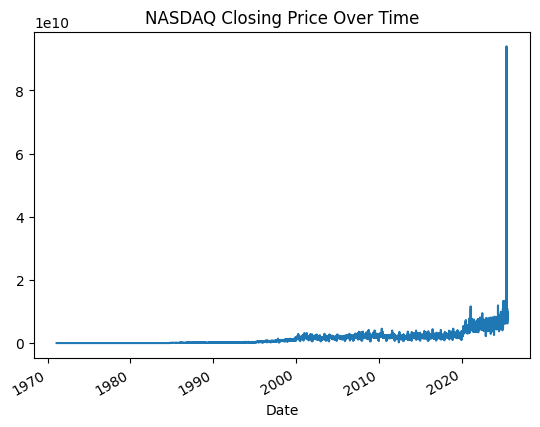

In [ ]:
# Visulize the Volume data 
nasdaq_df['Volume'].plot(title='NASDAQ Volume Over Time')

<Axes: title={'center': 'NASDAQ Closing Price: 50-Day Rolling Mean'}, xlabel='Date'>

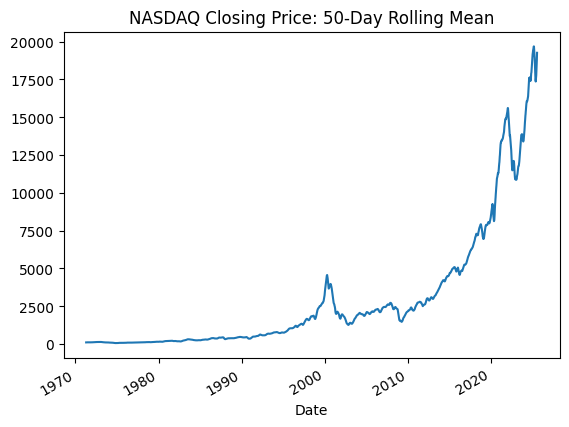

In [20]:
nasdaq_df['Close'].rolling(window=50).mean().plot(title='NASDAQ Closing Price: 50-Day Rolling Mean')

<Axes: >

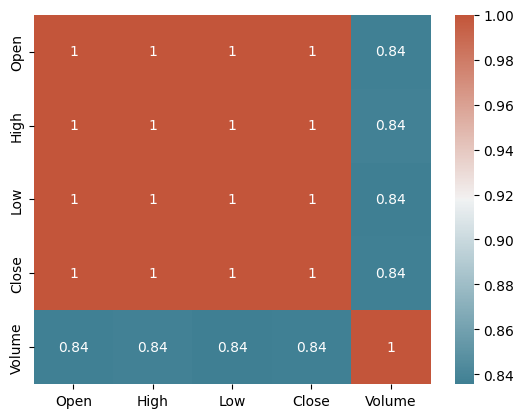

In [14]:
# Calculate correlation matrix
corr = nasdaq_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Reflection:** The correlation matrix usefulness depends on the variation in the data. Open, High, Low, Close are price-related columns and will likely be highly correlated. Volume could show different behavior and may have interesting correlations. Dividends and Stock Splits are constant (0.0), which means they will have zero variance. As a result, correlation cannot be computed for these with any other variable (they return NaN in the matrix). Dividends and Stock Splits were dropped due to zero variance. We see values very close to 1 among Open, High, Low, and Close since their values are tightly coupled. Volume varies a little and we see more interesting correlations with the price columns.


### Setting target for Machine Learning

In [15]:
# Set tomorrow's value
nasdaq_df["Tomorrow"] = nasdaq_df["Close"].shift(-1)


In [16]:
# Set Target (1 = positive direction and 0 = negative direction)
nasdaq_df["Target"] = (nasdaq_df["Tomorrow"] > nasdaq_df["Close"]).astype(int)

# Show data with new feature
nasdaq_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2025-07-03 00:00:00-04:00,20497.660156,20624.509766,20480.220703,20601.099609,6177910000,20412.519531,0
2025-07-07 00:00:00-04:00,20490.550781,20511.820312,20323.019531,20412.519531,8345710000,20418.460938,1
2025-07-08 00:00:00-04:00,20466.929688,20480.890625,20377.359375,20418.460938,8437480000,20611.339844,1


In [17]:
# Copy Data Frame into new variable
nasdaq_ml_df = nasdaq_df.copy()

# Only use data after the year 2000 (Do this to eliminate any large market shift that may influence the overall direction of the market)
nasdaq_ml_df = nasdaq_ml_df.loc["2000-01-01":].copy()

# Save Cleaned data to CSV file
nasdaq_ml_df.to_csv("nasdaq_yf_clean.csv")

# Show data with new minimum date
nasdaq_ml_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,3901.689941,0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3877.540039,0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3727.129883,0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3882.620117,1
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,4049.669922,1
...,...,...,...,...,...,...,...
2025-07-03 00:00:00-04:00,20497.660156,20624.509766,20480.220703,20601.099609,6177910000,20412.519531,0
2025-07-07 00:00:00-04:00,20490.550781,20511.820312,20323.019531,20412.519531,8345710000,20418.460938,1
2025-07-08 00:00:00-04:00,20466.929688,20480.890625,20377.359375,20418.460938,8437480000,20611.339844,1


#### Train a machine learning model

lag-based time-series prediction (e.g., predicting future prices based on past data).

In [18]:
# Select data to train
# Split the dataset into a training set (all but last 100 rows) and a test set (last 100 rows)
train = nasdaq_ml_df.iloc[:-100]
test = nasdaq_ml_df.iloc[-100:]

# Create a figure and axis for plotting, with a custom figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot training and test data
train['Close'].plot(ax=ax, label='Training Set', color='blue')
test['Close'].plot(ax=ax, label='Test Set', color='orange')

# Add vertical line at the split point
split_date = test.index[0]
ax.axvline(split_date, color='black', linestyle='--', label='Train/Test Split')

# Add title and legend
ax.set_title("NASDAQ Close Price: Train/Test Split")
ax.legend()

# Display the plot
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [ ]:
# Import Scikit-learn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score


              precision    recall  f1-score   support

           0       0.46      0.72      0.56       471
           1       0.49      0.25      0.33       529

    accuracy                           0.47      1000
   macro avg       0.48      0.48      0.44      1000
weighted avg       0.48      0.47      0.44      1000

Fold 1 Accuracy: 0.4680
Fold 1 Precision: 0.4943
              precision    recall  f1-score   support

           0       0.45      0.67      0.54       437
           1       0.59      0.37      0.45       563

    accuracy                           0.50      1000
   macro avg       0.52      0.52      0.49      1000
weighted avg       0.53      0.50      0.49      1000

Fold 2 Accuracy: 0.4980
Fold 2 Precision: 0.5864
              precision    recall  f1-score   support

           0       0.44      0.62      0.52       440
           1       0.56      0.39      0.46       560

    accuracy                           0.49      1000
   macro avg       0.50      0

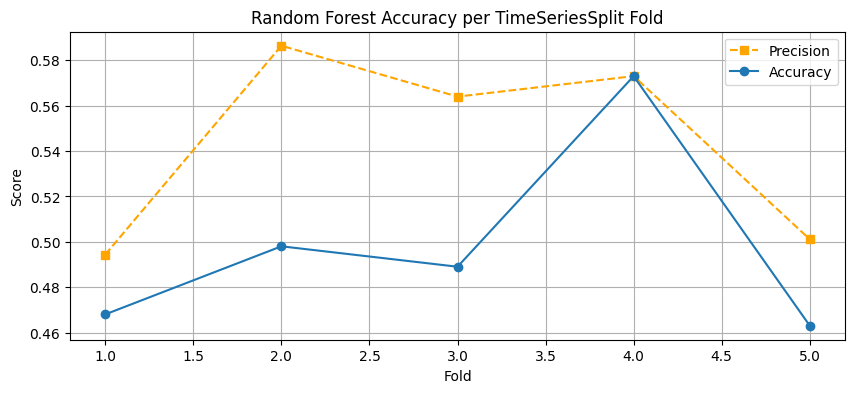

In [ ]:
# Ensure data is sorted by time
# This is critical for time series models to avoid data leakage
nasdaq_ml_df = nasdaq_ml_df.sort_index()

# Define the predictor features (independent variables) and the target (dependent variable)
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Target'

# Extract feature matrix X and target vector y from the DataFrame
X = nasdaq_ml_df[predictors]
y = nasdaq_ml_df[target]

# Initialize time series cross-validation with 5 splits
# test_size=1000 defines how many observations are used for each test set
# gap=0 means no spacing between train and test sets
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize the Random Forest model
# n_estimators: number of trees in the forest
# min_samples_split: minimum samples required to split an internal node
# random_state: ensures reproducibility
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Initialize variables to track accuracy scores and fold number
fold = 1
accuracies = []
precisions = []

# Perform time series cross-validation
for train_idx, test_idx in tss.split(X):
    # Get training and testing subsets for this fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    preds = model.predict(X_test)

    # Print classification metrics for the fold
    # Replace any undefined precision/recall (due to division by zero) with 0
    print(classification_report(y_test, preds, zero_division=0))

    # Compute and store accuracy for the fold
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)  # Avoid divide-by-zero error

    accuracies.append(acc)
    precisions.append(prec)


    # Display fold number and accuracy
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1

# Plot accuracy across folds
plt.figure(figsize=(10, 4))
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.plot(range(1, 6), accuracies, label='Accuracy', marker='o')
plt.title("Random Forest Accuracy per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

We split the time ordered dataset into 5 sequential train-test folds. Each fold tested the model on the next 100 data points, ensuring no data leakage from the future into the past. Fold 1 uses the earliest data to train and predicts the next 1000 time points; fold 2 uses more history, and so on.

In [ ]:
# Create varitey of rolling averages
horizons = [2,5,60,250,1000] # Horizons on how to look at rolling means. 2 days, 5 trading days,3 months 60 trading days, 250 = 1 year, 4 years =1000
new_predictors = []

for horizon in horizons:
    rolling_averages = nasdaq_ml_df.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    nasdaq_ml_df[ratio_column] = nasdaq_ml_df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nasdaq_ml_df[trend_column] = nasdaq_ml_df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [ ]:
# Drop all rows with Null values
nasdaq_ml_df = nasdaq_ml_df.dropna()
nasdaq_ml_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 00:00:00-04:00,20360.150391,20418.310547,20266.359375,20369.730469,8220420000,20202.890625,0,1.002369,2.0,1.011435,5.0,1.110922,37.0,1.103620,146.0,1.374261,538.0
2025-07-01 00:00:00-04:00,20290.609375,20339.050781,20105.410156,20202.890625,8631710000,20393.130859,1,0.995888,1.0,1.000266,4.0,1.098177,37.0,1.094030,145.0,1.362496,537.0
2025-07-02 00:00:00-04:00,20184.369141,20397.220703,20181.740234,20393.130859,8378750000,20601.099609,1,1.004686,1.0,1.005508,4.0,1.103713,38.0,1.103766,145.0,1.374785,538.0


We chose to drop rows with missing values in the column because the dataset is large enough to support model training without them. Attempting to impute or fill in the missing values could introduce noise or bias, potentially reducing model performance.

['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000']

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.55      0.52       471
           1       0.54      0.47      0.50       529

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

Fold 1 Accuracy: 0.5100
Fold 1 Precision: 0.5425

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.56      0.50       437
           1       0.58      0.48      0.52       563

    accuracy                           0.51      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.53      0.51      0.52      1000

Fold 2 Accuracy: 0.5140
Fold 2 Precision: 0.5839

Fold 3 Classification Report:
  

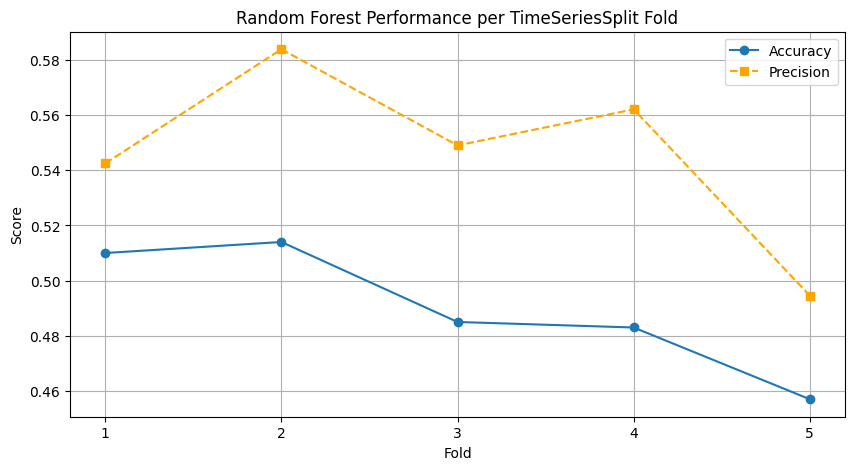

In [ ]:
# Ensure data is sorted by time
nasdaq_ml_df = nasdaq_ml_df.sort_index()

# Define predictors and target
predictors = new_predictors
target = 'Target'

X = nasdaq_ml_df[new_predictors]
y = nasdaq_ml_df[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Classification report
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_test, preds))

    # Accuracy and precision
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)  # Avoid divide-by-zero error

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1


# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

#### Fine tune the Machine Learning model
Create threshhold to increase the models precission. 
use new predictors to help improve model.

['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000']

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.68      0.55       471
           1       0.52      0.31      0.39       529

    accuracy                           0.48      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.49      0.48      0.46      1000

Fold 1 Accuracy: 0.4830
Fold 1 Precision: 0.5192

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.97      0.60       437
           1       0.59      0.04      0.07       563

    accuracy                           0.44      1000
   macro avg       0.51      0.50      0.33      1000
weighted avg       0.52      0.44      0.30      1000

Fold 2 Accuracy: 0.4430
Fold 2 Precision: 0.5882

Fold 3 Classification Report:
  

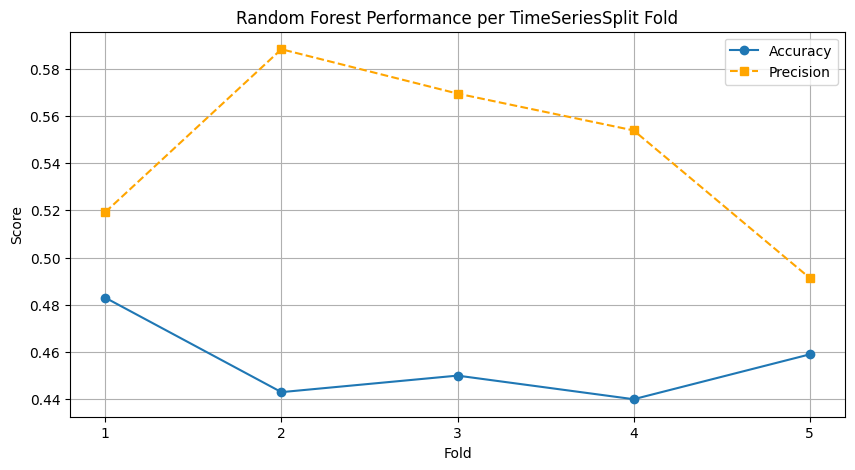

In [ ]:
# Ensure data is sorted by time
nasdaq_ml_df = nasdaq_ml_df.sort_index()

# Define predictors and target
predictors = new_predictors
target = 'Target'

X = nasdaq_ml_df[new_predictors]
y = nasdaq_ml_df[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=None)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    model.fit(X_train, y_train)

    # Predict with custom threshold
    proba_preds = model.predict_proba(X_test)[:, 1]
    preds = (proba_preds >= 0.6).astype(int)

    # Evaluation
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_test, preds))

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1

# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()


##### Creating a target to surpase with Model

In [ ]:
# Number of Days NASDAQ actually rose
#predictions["Target"].value_counts() / predictions.shape[0]

NameError: name 'predictions' is not defined

#### Improving the model

## Natural Language Processing of Sentiment Scores from r/Wallstreetbets

In [ ]:
import csv
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
# Load r/Wallstreetbets data
file_path = 'nasdaq_posts.csv'        

In [ ]:
# Load data into pandas dataframe
reddit_data = pd.read_csv('nasdaq_posts.csv')


str_cols = list(reddit_data.columns)
reddit_data.head()

,Title,Body,Date
0,Nasdaq didnt reclaim 10%. Dollar lost 9%.,"Comparing QQQ with EQQQ, and EUR/USD for compa...",2025-04-14 02:18:27
1,This morning NASDAQ dropped more than during L...,NASDAQ only lost 3.6% the first day of Lehman ...,2025-04-03 10:46:42
2,Biggest one-day gain for the NASDAQ since 10/1...,Puts will print bigly. I am convinced there wa...,2025-04-09 18:22:21
3,Elon Musk's Brother Kimbal Musk And Other Tesl...,NaN,2025-02-07 10:41:24
4,Jacked to the tits on puts - If NASDAQ is red ...,[Positions](https://imgur.com/pKmUFi9) - Got i...,2024-12-01 18:16:20


In [ ]:
# Get features of the dataset
reddit_features = list(reddit_data.columns)

reddit_features

['Title', 'Body', 'Date']

In [ ]:
# Examin missing values
print("Missing values distribution: ")
print(reddit_data.isnull().mean())
print("")

Missing values distribution: 
Title    0.000000
Body     0.493617
Date     0.000000
dtype: float64



In [ ]:
print("Column datatyped" )
print(reddit_data.dtypes)
print("")

Column datatyped
Title    object
Body     object
Date     object
dtype: object



In [ ]:
# Check affected rows with copy of data
original_reddit_data = reddit_data.copy()

# Remove leading and trailing space from columns with str type
str_cols = list(reddit_data.columns)
for col in str_cols:
    reddit_data[col] = reddit_data[col].str.strip()

# Check affected rows
affected_rows = (reddit_data != original_reddit_data) & original_reddit_data.notna()
rows_changed = affected_rows.any(axis=1)

print(reddit_data[rows_changed])

                                                 Title  \
47   Super Micro $SMCI submits Compliance Plan to N...   
76   Goldman Sachs Warns: Are U.S. Stocks on the Br...   
82                      $150k to $3m, 20x gain on 0dte   
83            Nancy Pelosi Buys More NVDA. Sells MSFT.   
140                               All in $nvda 130 eow   
165  From $145 to $9,000 in about three weeks, been...   

                                                  Body                 Date  
47                                                 NaN  2024-11-18 17:09:57  
76   Goldman Sachs are saying there’s a 70% chance ...  2025-01-10 17:24:41  
82   Trade was posted in real time on the wsb disco...  2024-02-21 16:06:39  
83                                                 NaN  2024-07-31 12:12:43  
140            Bulls can hold 120 all in 125 calls eow  2024-06-24 12:05:30  
165                                                NaN  2024-04-19 12:18:25  


In [ ]:
# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# List to hold date/polarity rows
sentiment_scores = []

# Open CSV and analyze sentiment for each row
with open(file_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        title = row['Title']
        body = row['Body']
        date = row['Date']
        text = f"{title} {body}"  # Combine title and body

        doc = nlp(text)
        polarity = doc._.blob.polarity

        if polarity > 0:
            sentiment_label = "Positive"
        elif polarity < 0:
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        
        # Append (date, polarity) as a list
        sentiment_scores.append([date, round(polarity, 3)])
        
    
        print(f"Title: {title[:60]}...")
        print(f"Polarity score: {polarity:.3f} ({sentiment_label})")
        print(f"Date: {date}")
        print("-" * 50)


Title: Nasdaq didnt reclaim 10%. Dollar lost 9%....
Polarity score: 0.200 (Positive)
Date: 2025-04-14 02:18:27
--------------------------------------------------
Title: This morning NASDAQ dropped more than during Lehman Monday...
Polarity score: 0.250 (Positive)
Date: 2025-04-03 10:46:42
--------------------------------------------------
Title: Biggest one-day gain for the NASDAQ since 10/13/2008 - but d...
Polarity score: 0.011 (Positive)
Date: 2025-04-09 18:22:21
--------------------------------------------------
Title: Elon Musk's Brother Kimbal Musk And Other Tesla Execs Sell O...
Polarity score: -0.125 (Negative)
Date: 2025-02-07 10:41:24
--------------------------------------------------
Title: Jacked to the tits on puts - If NASDAQ is red tomorrow I'm 1...
Polarity score: 0.098 (Positive)
Date: 2024-12-01 18:16:20
--------------------------------------------------
Title: For all the idiots screaming bubble, here's what the Nasdaq ...
Polarity score: -0.800 (Negative)
Date: 2024

In [ ]:
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 00:00:00-04:00,20360.150391,20418.310547,20266.359375,20369.730469,8220420000,20202.890625,0,1.002369,2.0,1.011435,5.0,1.110922,37.0,1.103620,146.0,1.374261,538.0
2025-07-01 00:00:00-04:00,20290.609375,20339.050781,20105.410156,20202.890625,8631710000,20393.130859,1,0.995888,1.0,1.000266,4.0,1.098177,37.0,1.094030,145.0,1.362496,537.0
2025-07-02 00:00:00-04:00,20184.369141,20397.220703,20181.740234,20393.130859,8378750000,20601.099609,1,1.004686,1.0,1.005508,4.0,1.103713,38.0,1.103766,145.0,1.374785,538.0


In [ ]:
# Step 1: Convert the sentiment_scores list to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores, columns=["Date", "Polarity"])


twitter_df = sentiment_scores_df.groupby([sentiment_scores_df['Date']]).mean()
print(twitter_df.shape)


(235, 1)


In [ ]:
# Print the number of duplicates
print("Duplicates in NASDAQ index:", nasdaq.index.duplicated().sum())
print("Duplicates in Twitter index:", twitter_df.index.duplicated().sum())

Duplicates in NASDAQ index: 0
Duplicates in Twitter index: 0


In [ ]:
twitter_df.to_csv('nasdaq_posts_clean.csv', index=True)

In [ ]:
from datetime import timezone, timedelta

# Fixed offset timezone (-05:00, no DST)
fixed_offset = timezone(timedelta(hours=-5))

# Make copies
twitter_df = twitter_df.copy()
nasdaq = nasdaq.copy()

# Ensure datetime and align timezone for NASDAQ
nasdaq.index = pd.to_datetime(nasdaq.index).normalize()
if nasdaq.index.tz is None:
    nasdaq.index = nasdaq.index.tz_localize(fixed_offset)
else:
    nasdaq.index = nasdaq.index.tz_convert(fixed_offset)

# Ensure datetime and align timezone for Twitter
twitter_df.index = pd.to_datetime(twitter_df.index).normalize()
if twitter_df.index.tz is None:
    twitter_df.index = twitter_df.index.tz_localize(fixed_offset)
else:
    twitter_df.index = twitter_df.index.tz_convert(fixed_offset)

# Combine
nasdaq = nasdaq[~nasdaq.index.duplicated(keep="first")]
twitter_df = twitter_df[~twitter_df.index.duplicated(keep="first")]


# Now combine
combined = pd.concat([nasdaq, twitter_df], axis=1).dropna()
combined

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,Polarity
Date,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:00-05:00,11816.330078,11924.280273,11784.150391,11890.929688,3.848160e+09,11895.230469,1.0,1.012782,2.0,1.052081,4.0,1.052651,35.0,1.229825,156.0,1.542235,585.0,0.000
2020-11-10 00:00:00-05:00,11622.440430,11665.870117,11424.610352,11553.860352,4.736560e+09,11786.429688,1.0,0.993127,0.0,0.985075,3.0,1.019845,34.0,1.190172,156.0,1.494793,584.0,0.000
2020-12-10 00:00:00-05:00,12247.549805,12431.559570,12214.740234,12405.809570,4.518580e+09,12377.870117,0.0,1.002702,1.0,0.995464,4.0,1.069631,35.0,1.240145,157.0,1.576188,584.0,0.000
2021-01-25 00:00:00-05:00,13681.209961,13728.980469,13368.679688,13635.990234,7.193710e+09,13626.059570,0.0,1.003419,2.0,1.012107,5.0,1.099896,39.0,1.305106,156.0,1.686453,586.0,0.059
2021-01-28 00:00:00-05:00,13323.290039,13507.639648,13316.519531,13337.160156,9.959270e+09,13070.690430,0.0,1.002502,1.0,0.989215,3.0,1.065576,39.0,1.270421,155.0,1.644770,585.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 00:00:00-05:00,19422.169922,19666.439453,19408.179688,19654.019531,6.477050e+09,19692.330078,1.0,1.006712,1.0,1.002884,2.0,1.008640,31.0,1.113312,142.0,1.369588,533.0,0.000
2025-02-05 00:00:00-05:00,19533.050781,19696.939453,19498.900391,19692.330078,6.712220e+09,19791.990234,1.0,1.000974,2.0,1.004224,3.0,1.009994,31.0,1.114451,142.0,1.371716,533.0,0.000
2025-02-07 00:00:00-05:00,19774.869141,19862.539062,19489.359375,19523.400391,7.748940e+09,19714.269531,1.0,0.993168,1.0,0.995546,3.0,1.000680,30.0,1.102952,141.0,1.358891,533.0,0.283


Accuracy: 0.2143
Precision: 0.2500


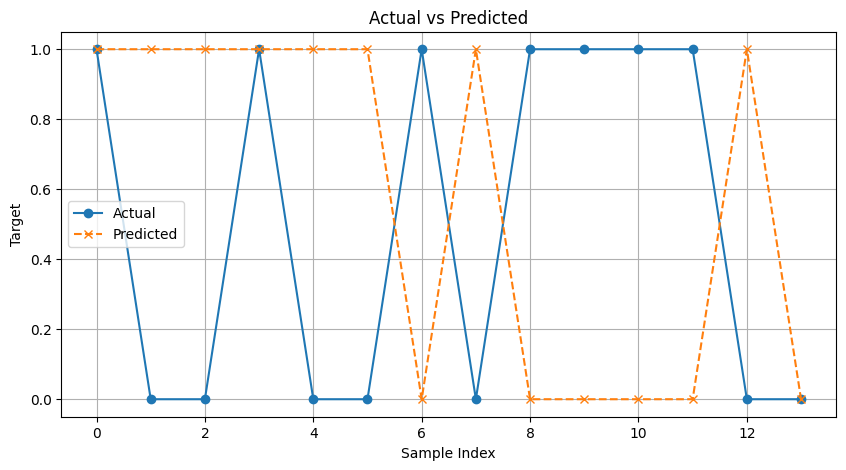

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

# Ensure data is sorted by time
combined = combined.sort_index()

# Make sure "Polarity" is in your predictors list
if "Polarity" not in new_predictors:
    new_predictors.append("Polarity")

target = 'Target'

# Features and target
X = combined[new_predictors]
y = combined[target]

# Manual train/test split
train_size = 56  # or len(X) - 15
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize model
model = RandomForestClassifier(n_estimators=5, min_samples_split=15, random_state=1)

# Train and predict
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")

# Optional: Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(preds, label="Predicted", marker="x", linestyle="--")
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Ensure data is sorted by time
combined = combined.sort_index()

# Append "Polarity"
predictors = new_predictors.append("Polarity")

# Define predictors and target
target = 'Target'

X = combined[new_predictors]
y = combined[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3, test_size=15, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=5, min_samples_split=15, random_state=1)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Classification report
    #print(f"\nFold {fold} Classification Report:")
    #print(classification_report(y_test, preds))

    # Accuracy and precision
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)  # Avoid divide-by-zero error

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1


# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000', 'Polarity', 'Polarity']


ValueError: Found input variables with inconsistent numbers of samples: [15, 14]

## TODO: Add extra Nasdaq data for a better sentiment analysis
## TODO: Add Linear Regreession ML model to compare results